In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv("/content/car price datasets.zip")


In [ ]:
print(df.head()) #Explore the Datasets
print(df.info())
print(df.describe())
print(df.isnull().sum())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [ ]:
# Step 3: Feature Engineering
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

In [ ]:
# Encode categorical features
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])  # Petrol=2, Diesel=0, CNG=1
df['Selling_type'] = le.fit_transform(df['Selling_type'])  # Dealer=0, Individual=1

df['Transmission'] = le.fit_transform(df['Transmission'])  # Manual=1, Automatic=0

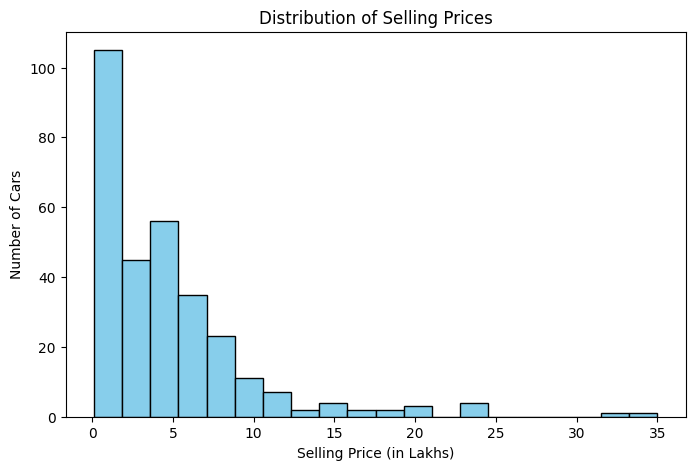

In [ ]:
# Step 4: Data Visualization - Simple Histogram
plt.figure(figsize=(8, 5))
df['Selling_Price'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (in Lakhs)')
plt.ylabel('Number of Cars')
plt.grid(False)
plt.show()

In [ ]:
# Step 5: Split Data
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 6: Train Models
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Save model to pickle
with open("car_price_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

In [ ]:
# Step 7: Evaluate Models
def evaluate_model(model, name):
    preds = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(f"R2 Score: {r2_score(y_test, preds):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, preds, alpha=0.7)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{name}: Actual vs Predicted")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.show()


Random Forest Evaluation:
R2 Score: 0.9593
MAE: 0.64
RMSE: 0.97


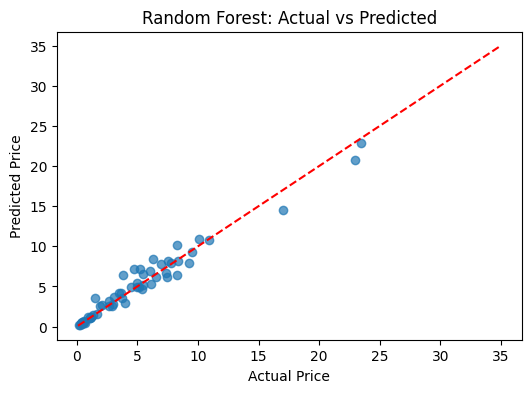

In [ ]:
# Evaluate both models
evaluate_model(rf_model, "Random Forest")

In [ ]:
# Step 8: Real-World Insight
# This system can assist:
# - Used car dealers to set fair prices
# - Buyers to avoid overpaying
# - Online platforms to build price recommendation engines


## Summary of Car Price Prediction Task:
# 1. Loaded and explored the car dataset.
# 2. Preprocessed data: handled categorical variables, created 'Car_Age'.
# 3. Visualized relationship between Fuel Type and Selling Price.
# 4. Split data into training and test sets.
# 5. Trained a Random Forest Regressor model.
# 6. Evaluated the model using R2 Score, MAE, and RMSE.
# 7. Saved the model using Pickle.
# 8. Developed a Streamlit app for real-time predictions.